In [45]:
# extract the run time and number of operations (matmult) from the log file of each method (from ts_run.py)
# plot the linear relation relation between number of operations (matmult) and run time
# plot the L-curve between F_distance (calculated in ts_run.py) and number of operations (matmult): find the optimal method

import numpy as np
import matplotlib.pyplot as plt
import h5py


def extract_lines_with_keyword(file_path, keyword):
    # List to store lines that contain the keyword
    extracted_lines = []

    # Open the text file in read mode
    with open(file_path, 'r') as file:
        # Iterate over each line in the file
        for line in file:
            # Check if the keyword is in the current line
            if keyword in line:
                # Append the line to the list if keyword is present
                extracted_lines.append(line.strip())

    return extracted_lines



# # load the baseline data (high resolution)
# filename = "output_baseline/refmodel_refine3_order2_beuler_dt1year-domain.h5"
# with h5py.File(filename, "r") as f:

#     vertex_fields = list(f.keys())[2]

#     displacement = list(f[vertex_fields])[0]    # data name in the group
#     data_tmp = f[vertex_fields][displacement]
#     data_baseline = np.squeeze(data_tmp[-1,:,:])

#     # print(f'Baseline model: Total timestep:', {data_baseline.shape[0]}, 'Total nodes' , {data_baseline.shape[1]},'d.o.f.' , {data_baseline.shape[2]} ) 

#     # spatial location
#     geometry = list(f.keys())[0]
#     vertices = list(f[geometry])[0]    # data name in the group
#     xz_baseline_tmp = f[geometry][vertices]  # 2*2
#     xz_baseline = xz_baseline_tmp[:,:]

/tmp/ipykernel_3621/3586348252.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


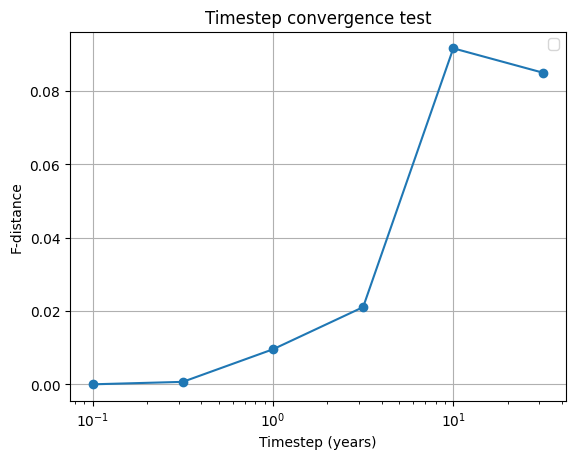

In [46]:
# load the timestep test results: timestep, distance
data = np.load('distance_time_convergence.npz')   

# Data for plotting
fig, ax = plt.subplots()
ax.plot(data['t'], data['error'], marker="o")

ax.set(xlabel='Timestep (years)', ylabel='F-distance', title='Timestep convergence test')
ax.set_xscale('log')

ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()


In [47]:


N = 16       # total number of solvers
matmult = np.zeros(N)
run_time = np.zeros(N)

for i in range(N):
    # Path to the text file
    file_path = './perf/'+ str(i+1) +  '.txt'

    print(file_path)
    # Keyword to search for in the file
    # keyword = '3:             Run:'

    keyword = 'MatMult '
    # Extract lines containing the keyword
    lines = extract_lines_with_keyword(file_path, keyword)    # only one line contains the time

    for line in lines[1:]:    # only count the matmul of the run
    # for line in lines:
        # Strip leading and trailing whitespace
        line = line.strip()
        words = line.strip().split()
        print(words)

        matmult[i] += float(words[1]) 

    keyword = 'Run:'

    # Extract lines containing the keyword
    lines = extract_lines_with_keyword(file_path, keyword)    # only one line contains the time

    for line in lines:
        # Strip leading and trailing whitespace
        line = line.strip()
        words = line.strip().split()
        print(words)

        run_time[i] += float(words[2]) 
        
print("Total number of matrix multiplication (setup + run): " + str(matmult))
print("Total run time (second): " + str(run_time))
    # # # Print the extracted lines
    # print("Lines containing the keyword:")
    # for line in lines:
    #     print(line)




./perf/1.txt
['MatMult', '6123184', '1.0', '2.9184e+00', '1.0', '6.14e+09', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '3', '56', '0', '0', '0', '3', '56', '0', '0', '0', '2105']
['3:', 'Run:', '9.5633e+01', '98.0%', '1.0955e+10', '99.9%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf/2.txt
['MatMult', '429416', '1.0', '5.5627e-01', '1.0', '2.24e+09', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '4', '61', '0', '0', '0', '4', '61', '0', '0', '0', '4032']
['3:', 'Run:', '1.3137e+01', '89.4%', '3.6552e+09', '99.8%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf/3.txt
['MatMult', '6133127', '1.0', '3.1770e+00', '1.0', '6.26e+09', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '3', '52', '0', '0', '0', '3', '52', '0', '0', '0', '1971']
['3:', 'Run:', '1.1271e+02', '98.3%', '1.1971e+10', '99.9%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf/4.txt
['MatMult', '491893', '1.0', '6.4745e-01', '1.0', '2.56e+09', '1.0', '0.0e+00', '0.0e+00

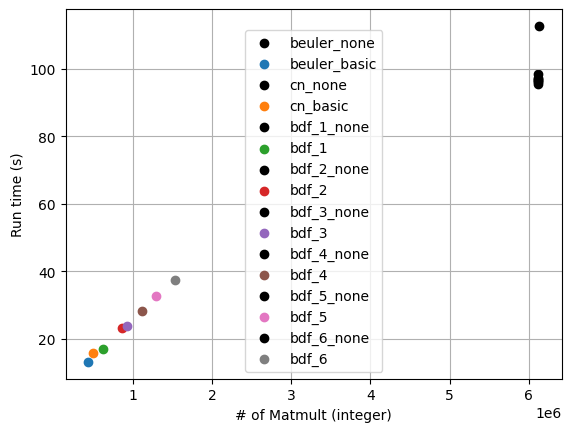

In [48]:
# taken from https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html
# https://matplotlib.org/tutorials/introductory/sample_plots.html
# You may need to type %matplotlib inline here

labels = ["beuler_none","beuler_basic","cn_none","cn_basic","bdf_1_none", "bdf_1", "bdf_2_none", "bdf_2", \
          "bdf_3_none", "bdf_3","bdf_4_none","bdf_4",  "bdf_5_none","bdf_5","bdf_6_none", "bdf_6"]

# Data for plotting
fig, ax = plt.subplots()
for i in range(N):
       if i in np.arange(1,16,2):
              ax.scatter(matmult[i], run_time[i], label=labels[i])
       else:
              ax.scatter(matmult[i], run_time[i], label=labels[i], color= "k")

ax.set(xlabel='# of Matmult (integer)', ylabel='Run time (s)',
       title='')
ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()



[0.15808324 0.15582016 0.16136064 0.38950798 0.15808274 0.34420625
 0.15808274 0.32293581 0.15808274 0.31062034 0.15808274 0.28256963
 0.15808274 0.28800266 0.15808274 0.25229752]
[6123184.  429416. 6133127.  491893. 6122854.  612570. 6122854.  858374.
 6122854.  919591. 6122854. 1104613. 6122854. 1288703. 6122854. 1533390.]


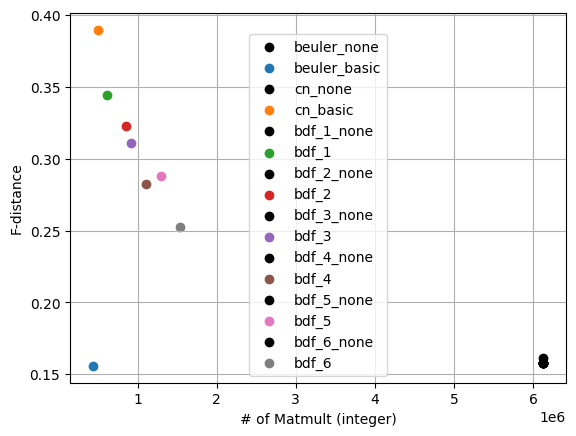

In [49]:
# distance = [0. ,0.01986094, 0.33407299, 0.1566364,  0.29071953, 0.26608679, 0.23403724, 0.17496637, 0.15404278, 0.11963454]
# distance = [0.  ,       0.01986094, 0.33407299, 0.1566364 , 0.29071953 ,0.26608679, 0.23403724, 0.17496637, 0.15404278, 0.11963454]
distance = np.load("distance_methods_31.npy")
# distance = np.abs(distance - np.mean(distance))
print(distance)
print(matmult)

# plt.figure(figsize=(12, 6))

# Data for plotting
fig, ax = plt.subplots()
for i in range(N):
      # print(i)
      if i in np.arange(1,16,2):
            ax.scatter(matmult[i], distance[i], label=labels[i])
      else:
            ax.scatter(matmult[i], distance[i], label=labels[i], color = "k")   # non-adaptive

ax.set(xlabel='# of Matmult (integer)', ylabel='F-distance',
       title='')
ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()

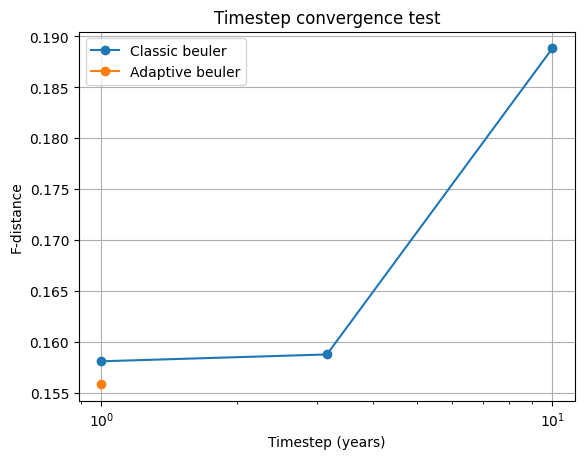

In [50]:
# load the timestep test results: timestep, distance
data_comparison = np.load('distance_time_convergence_comparison.npz') 

# Data for plotting
fig, ax = plt.subplots()
ax.plot(data_comparison['t'][1:], data_comparison['error'][1:], marker="o", label = "Classic beuler")
ax.plot(data_comparison['t'][0], data_comparison['error'][0], marker="o", label = "Adaptive beuler")

ax.set(xlabel='Timestep (years)', ylabel='F-distance', title='Timestep convergence test')
ax.set_xscale('log')
# ax.set_yscale('log')

ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()

In [51]:
# run time evaluation of all ts-adaptive methods

N = len(data_comparison['t'])       # total number of solvers
print(N)
matmult = np.zeros(N)
run_time = np.zeros(N)

for i in range(N):
    # Path to the text file
    file_path = './perf_ts_comparison/'+ str(i+1) +  '.txt'

    print(file_path)
    # Keyword to search for in the file
    # keyword = '3:             Run:'

    keyword = 'MatMult '
    # Extract lines containing the keyword
    lines = extract_lines_with_keyword(file_path, keyword)    # only one line contains the time

    for line in lines[1:]:    # only count the matmul of the run
    # for line in lines:
        # Strip leading and trailing whitespace
        line = line.strip()
        words = line.strip().split()
        print(words)

        matmult[i] += float(words[1]) 

    keyword = 'Run:'

    # Extract lines containing the keyword
    lines = extract_lines_with_keyword(file_path, keyword)    # only one line contains the time

    for line in lines:
        # Strip leading and trailing whitespace
        line = line.strip()
        words = line.strip().split()
        print(words)

        run_time[i] += float(words[2]) 
        
print("Total number of matrix multiplication (setup + run): " + str(matmult))
print("Total run time (second): " + str(run_time))
    # # # Print the extracted lines
    # print("Lines containing the keyword:")
    # for line in lines:
    #     print(line)



4
./perf_ts_comparison/1.txt
['MatMult', '429416', '1.0', '5.5612e-01', '1.0', '2.24e+09', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '4', '61', '0', '0', '0', '4', '61', '0', '0', '0', '4033']
['3:', 'Run:', '1.2763e+01', '88.7%', '3.6552e+09', '99.8%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf_ts_comparison/2.txt
['MatMult', '6123184', '1.0', '2.9033e+00', '1.0', '6.14e+09', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '3', '56', '0', '0', '0', '3', '56', '0', '0', '0', '2116']
['3:', 'Run:', '9.6493e+01', '98.2%', '1.0955e+10', '99.9%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf_ts_comparison/3.txt
['MatMult', '2003042', '1.0', '1.1770e+00', '1.0', '3.08e+09', '1.0', '0.0e+00', '0.0e+00', '0.0e+00', '3', '60', '0', '0', '0', '3', '60', '0', '0', '0', '2621']
['3:', 'Run:', '3.4759e+01', '95.7%', '5.1496e+09', '99.8%', '0.000e+00', '0.0%', '0.000e+00', '0.0%', '0.000e+00', '0.0%']
./perf_ts_comparison/4.txt
['MatMult', '669389', '1.0', '

In [52]:
# beuler + fixed_timestep   vs 

# Data for plotting
labels = ["Adaptive_" + str(round(data_comparison['t'][0],2)) + "yr", "Classic_" + str(round(data_comparison['t'][1],2)) + "yr", \
          "Classic_" + str(round(data_comparison['t'][2],2)) + "yr","Classic_" + str(round(data_comparison['t'][3],2)) + "yr", ]
       #    "Classic_" + str(data_comparison['t'][4]) + "yr"]

print(labels)

['Adaptive_1.0yr', 'Classic_1.0yr', 'Classic_3.16yr', 'Classic_10.0yr']


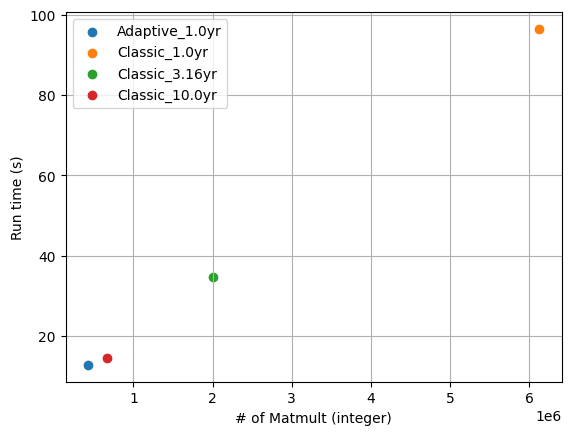

In [53]:

fig, ax = plt.subplots()
for i in range(N):

       ax.scatter(matmult[i], run_time[i], label=labels[i])

ax.set(xlabel='# of Matmult (integer)', ylabel='Run time (s)',
       title='')
ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()




[12.763 96.493 34.759 14.474] [0.15582016 0.15808324 0.15875405 0.18882761]


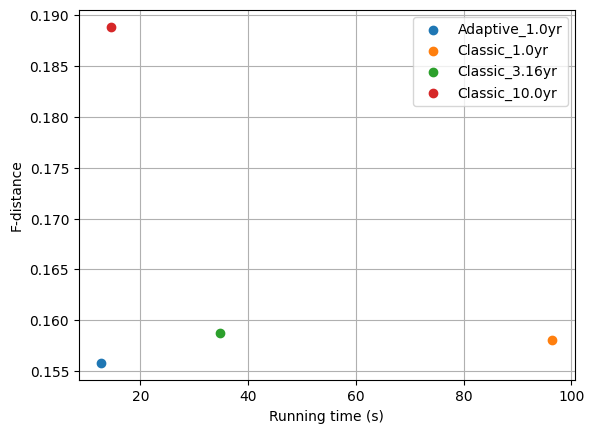

In [54]:
# matmult vs. F-error
print(run_time, data_comparison['error'])

fig, ax = plt.subplots()
for i in range(N):
       ax.scatter(run_time[i], data_comparison['error'][i] , label=labels[i])

ax.set(xlabel='Running time (s)', ylabel='F-distance', title='')
ax.legend()
ax.grid()

# fig.savefig("test.png")
plt.show()
